/tmp/ipykernel_14336/3445038212.py:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(u1, u2, "r-", label='Forward Method', marker='o', markersize=4, linestyle='dashed')
/tmp/ipykernel_14336/3445038212.py:47: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(a1, a2, "k-", label='Backward Method', marker='s', markersize=4, linestyle='dashed')
/tmp/ipykernel_14336/3445038212.py:48: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(c1, c2, "b-", label='Central Method', marker='^', markersize=4, linestyle='dashed')
/home/redhat_pc/redhat_files/redhat_projects/.venv/lib/python3.12/site-packages/matplotlib

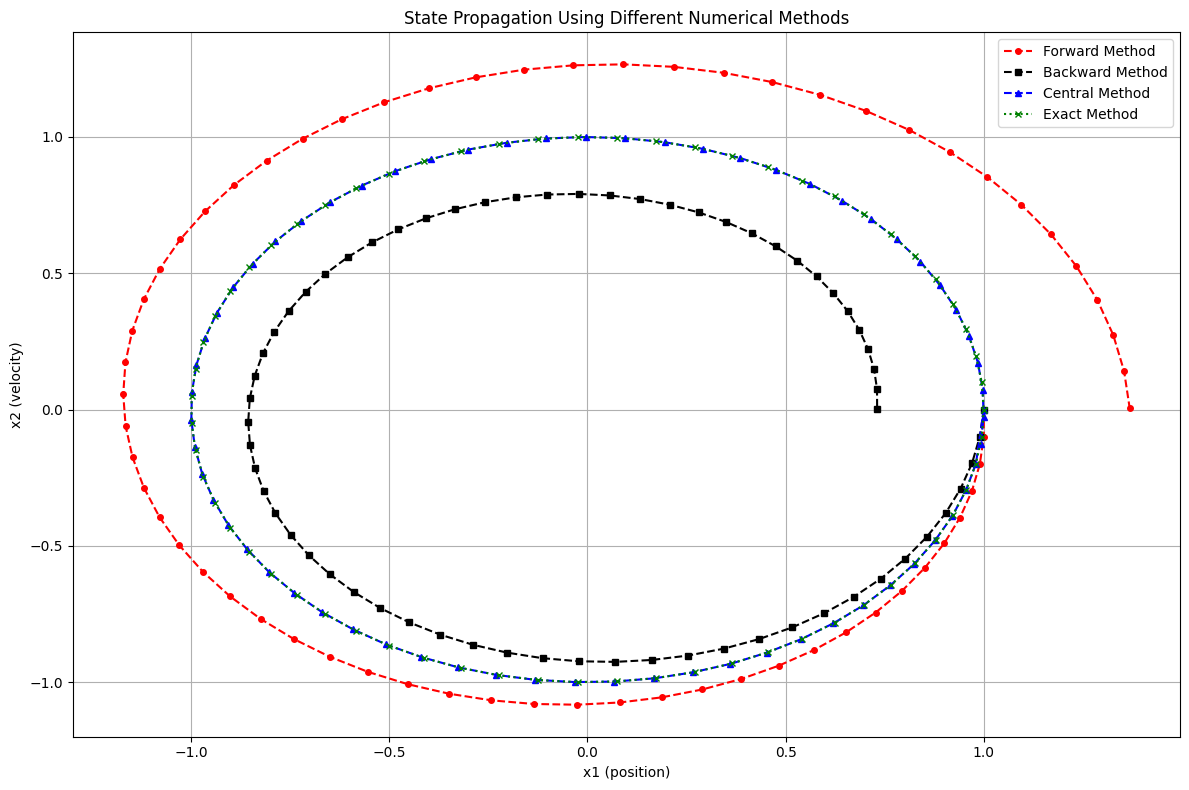

In [5]:
# main.py
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from methods.numarical_methods import forward_setup, backward_setup, analytical_setup, central_setup
from calc.jax_calc import fast_calc, fast_analytical_solver

# Enable 64-bit precision in JAX for better numerical accuracy
jax.config.update("jax_enable_x64", True)

# Define the system matrix (A) and initial conditions
A = jnp.array([[0, 1], [-1, 0]], dtype=jnp.float64)
dt = 0.1
ini = jnp.array([1, 0], dtype=jnp.float64)
T = 2 * jnp.pi  # Total time for 2 full periods (2 * 2π)
steps = int(jnp.round(T / dt))  # Number of steps
t = jnp.linspace(0, T, steps+1, dtype=jnp.float64)  # Time vector

# Setup matrices for different methods
Uf = forward_setup(A, dt)
Ub = backward_setup(A, dt)
Uc = central_setup(A, dt)
Exact = analytical_setup(A, ini)

# Compute the state propagation for forward, backward, and central methods
U1 = fast_calc(steps, method="F", include_init=True)(Uf, ini)
U2 = fast_calc(steps, method="B", include_init=True)(Ub, ini)
EU = fast_analytical_solver(*Exact)(t)

# For the central method, we need to compute the initial steps differently
u_0 = ini
u_1 = EU[1]
ini_c = jnp.vstack([u_0, u_1])
U3 = fast_calc(steps, method="C", include_init=True)(Uc, ini_c)

# Extract the coordinates for plotting
u1, u2 = U1.T
a1, a2 = U2.T
c1, c2 = U3.T
b1, b2 = EU.T

# Plotting the results
plt.figure(figsize=(12, 8))

# Plot each method with different markers and colors
plt.plot(u1, u2, "r-", label='Forward Method', marker='o', markersize=4, linestyle='dashed')
plt.plot(a1, a2, "k-", label='Backward Method', marker='s', markersize=4, linestyle='dashed')
plt.plot(c1, c2, "b-", label='Central Method', marker='^', markersize=4, linestyle='dashed')
plt.plot(b1, b2, "g-", label='Exact Method', marker='x', markersize=4, linestyle='dotted')

# Enhance the plot with grid, labels, title, and legend
plt.grid(True)
plt.xlabel('x1 (position)')
plt.ylabel('x2 (velocity)')
plt.title('State Propagation Using Different Numerical Methods')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()